In [1]:
import pandas as pd
import numpy as np
from numpy import dot
from numpy.linalg import norm

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_before = pd.read_csv('pidicon2023_dataset.csv', low_memory=False)
df_after = pd.read_csv('after_dataset.csv', low_memory=False)

df_before.shape, df_after.shape

((100000, 38), (99999, 38))

In [3]:
df_before

,행번호,회원 ID,성별,생년월일,가구특성,세대구분,추정거주지,단말기코드,멤버십 사용 횟수,멤버십 사용 금액,...,홈쇼핑(지수),국외직접구매(지수),면세점/백화점(지수),화장품(지수),이미용성형(지수),국내여행(지수),해외여행(지수),공연장방문횟수,극장 방문 횟수,자동차 극장 방문횟수
0,1,D10000200,1,1987-12-30,4,1,3117056000,2,0,0,...,0.54983,0.71988,0.60739,0.59609,0.6229,0.81257,0.81556,3,1,1
1,2,D10000225,2,1971-01-21,5,1,3120053000,1,1,1761,...,0.82694,0.79885,0.71105,0.88571,0.90281,0.92985,0.37397,9,13,5
2,3,D10000657,1,1940-11-21,4,1,3114051000,1,0,0,...,0.81568,0.04994,0.16831,0.51137,0.22137,0.77133,0.82122,21,4,9
3,4,D10001185,1,1933-11-15,5,1,3120053000,1,0,0,...,0.95852,0.51806,0.65098,0.72958,0.19201,0.07207,0.69407,12,10,4
4,5,D10001358,1,1979-02-25,4,2,3114062500,1,3,3345,...,0.04566,0.72221,0.1471,0.89151,0.93744,0.86596,0.98461,3,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,D27990777,2,1959-04-06,4,2,3171025000,1,0,0,...,0.30881,0.01893,0.18,0.7424,0.03951,0.87773,0.89242,2,2,11
99996,99997,D27990915,1,1976-10-14,5,1,3111065000,2,3,5586,...,0.02574,0.07813,0.30249,0.79131,0.80797,0.61185,0.05218,4,1,34
99997,99998,D27990930,1,1998-01-08,4,1,3171025900,1,0,0,...,0.11707,0.05216,0.94796,0.9976,0.92819,0.27747,0.45034,6,7,3
99998,99999,D27991081,1,2000-05-29,1,2,3111055000,1,0,0,...,0.90766,0.51147,0.89994,0.66179,0.5022,0.67836,0.99754,7,1,2


In [4]:
df_after

,행번호,회원 ID,성별,생년월일,가구특성,세대구분,추정거주지,단말기코드,멤버십 사용 횟수,멤버십 사용 금액,...,홈쇼핑(지수),국외직접구매(지수),면세점/백화점(지수),화장품(지수),이미용성형(지수),국내여행(지수),해외여행(지수),공연장방문횟수,극장 방문 횟수,자동차 극장 방문횟수
0,1,*,1,"[30, 40[",4,1,"{26, 27, 31, 47, 48}",2,0,0,...,0.54983,0.71988,0.60739,0.59609,0.62290,0.81257,0.81556,3,1,1
1,2,*,2,"[50, 60[",5,1,"{26, 27, 31, 47, 48}",1,1,1761,...,0.82694,0.79885,0.71105,0.88571,0.90281,0.92985,0.37397,9,13,5
2,3,*,1,>=70,4,1,"{26, 27, 31, 47, 48}",1,0,0,...,0.81568,0.04994,0.16831,0.51137,0.22137,0.77133,0.82122,21,4,9
3,4,*,1,>=70,5,1,"{26, 27, 31, 47, 48}",1,0,0,...,0.95852,0.51806,0.65098,0.72958,0.19201,0.07207,0.69407,12,10,4
4,5,*,1,"[40, 50[",4,2,"{26, 27, 31, 47, 48}",1,3,3345,...,0.04566,0.72221,0.14710,0.89151,0.93744,0.86596,0.98461,3,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,99996,*,2,"[60, 70[",4,2,"{26, 27, 31, 47, 48}",1,0,0,...,0.30881,0.01893,0.18000,0.74240,0.03951,0.87773,0.89242,2,2,11
99995,99997,*,1,"[40, 50[",5,1,"{26, 27, 31, 47, 48}",2,3,5586,...,0.02574,0.07813,0.30249,0.79131,0.80797,0.61185,0.05218,4,1,34
99996,99998,*,1,"[20, 30[",4,1,"{26, 27, 31, 47, 48}",1,0,0,...,0.11707,0.05216,0.94796,0.99760,0.92819,0.27747,0.45034,6,7,3
99997,99999,*,1,"[20, 30[",1,2,"{26, 27, 31, 47, 48}",1,0,0,...,0.90766,0.51147,0.89994,0.66179,0.50220,0.67836,0.99754,7,1,2


In [5]:
target_index = -1
for i in range(len(df_after)):
    if df_after.iloc[i]['행번호'] != i+1:
        target_index = i
        print(target_index)
        break

28518


In [6]:
df_before.drop([target_index], axis=0, inplace=True)
df_before = df_before.reset_index(drop=True)
df_before

,행번호,회원 ID,성별,생년월일,가구특성,세대구분,추정거주지,단말기코드,멤버십 사용 횟수,멤버십 사용 금액,...,홈쇼핑(지수),국외직접구매(지수),면세점/백화점(지수),화장품(지수),이미용성형(지수),국내여행(지수),해외여행(지수),공연장방문횟수,극장 방문 횟수,자동차 극장 방문횟수
0,1,D10000200,1,1987-12-30,4,1,3117056000,2,0,0,...,0.54983,0.71988,0.60739,0.59609,0.6229,0.81257,0.81556,3,1,1
1,2,D10000225,2,1971-01-21,5,1,3120053000,1,1,1761,...,0.82694,0.79885,0.71105,0.88571,0.90281,0.92985,0.37397,9,13,5
2,3,D10000657,1,1940-11-21,4,1,3114051000,1,0,0,...,0.81568,0.04994,0.16831,0.51137,0.22137,0.77133,0.82122,21,4,9
3,4,D10001185,1,1933-11-15,5,1,3120053000,1,0,0,...,0.95852,0.51806,0.65098,0.72958,0.19201,0.07207,0.69407,12,10,4
4,5,D10001358,1,1979-02-25,4,2,3114062500,1,3,3345,...,0.04566,0.72221,0.1471,0.89151,0.93744,0.86596,0.98461,3,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,99996,D27990777,2,1959-04-06,4,2,3171025000,1,0,0,...,0.30881,0.01893,0.18,0.7424,0.03951,0.87773,0.89242,2,2,11
99995,99997,D27990915,1,1976-10-14,5,1,3111065000,2,3,5586,...,0.02574,0.07813,0.30249,0.79131,0.80797,0.61185,0.05218,4,1,34
99996,99998,D27990930,1,1998-01-08,4,1,3171025900,1,0,0,...,0.11707,0.05216,0.94796,0.9976,0.92819,0.27747,0.45034,6,7,3
99997,99999,D27991081,1,2000-05-29,1,2,3111055000,1,0,0,...,0.90766,0.51147,0.89994,0.66179,0.5022,0.67836,0.99754,7,1,2


# Cosine Similarity

In [7]:
# 코사인 유사도가 아닌 스칼라곱 = dot

In [8]:
col_list = list(df_before.columns)
col_list

['행번호',
 '회원 ID',
 '성별',
 '생년월일',
 '가구특성',
 '세대구분',
 '추정거주지',
 '단말기코드',
 '멤버십 사용 횟수',
 '멤버십 사용 금액',
 '소액결제 사용 횟수',
 '소액결제 사용 금액',
 '쿠팡사용일수',
 '네이버 쇼핑 사용일수',
 '11번가 사용일수',
 '당근마켓 사용일수',
 '옥션, G마켓 사용일수',
 '요기요 사용일수',
 '배달의 민족 사용일수',
 '쿠팡이츠 사용일수',
 '패스트패션(지수)',
 '명품의류(지수)',
 '신발(지수)',
 '배달음식(지수)',
 '넷플릭스(지수)',
 '영화(지수)',
 '대형마트(지수)',
 '오픈마켓(지수)',
 '홈쇼핑(지수)',
 '국외직접구매(지수)',
 '면세점/백화점(지수)',
 '화장품(지수)',
 '이미용성형(지수)',
 '국내여행(지수)',
 '해외여행(지수)',
 '공연장방문횟수',
 '극장 방문 횟수',
 '자동차 극장 방문횟수']

In [9]:
col_list.remove('행번호')

In [10]:
# float_list = list()
# for colname in col_list:
#     if "지수" in colname:
#         float_list.append(colname)
# float_list

In [11]:
# df_before_tmp = df_before.copy()
# df_after_tmp = df_after.copy()
# for colname in tqdm(float_list):
#     df_before_tmp[colname] = df_before_tmp[colname].apply(lambda x:x*100000)
#     df_after_tmp[colname] = df_after_tmp[colname].apply(lambda x:x*100000)

In [12]:
score = 0
for colname in col_list:
    try:
        val = dot(df_before[colname], df_after[colname])
        score += val
        print(f'[Success] {colname}: {str(val)}')
        
    except Exception as e:
        print(f'[Failed] {colname}: {str(e)}')

[Failed] 회원 ID: can't multiply sequence by non-int of type 'str'
[Success] 성별: 248442
[Failed] 생년월일: can't multiply sequence by non-int of type 'str'
[Success] 가구특성: 1897371
[Success] 세대구분: 195314
[Failed] 추정거주지: 
[Success] 단말기코드: 265285
[Success] 멤버십 사용 횟수: 1507359
[Success] 멤버십 사용 금액: 4046950735229
[Success] 소액결제 사용 횟수: 1275701
[Success] 소액결제 사용 금액: 3131072897020000
[Success] 쿠팡사용일수: 3759109
[Success] 네이버 쇼핑 사용일수: 4989500
[Success] 11번가 사용일수: 4384151
[Success] 당근마켓 사용일수: 2384149
[Success] 옥션, G마켓 사용일수: 3376670
[Success] 요기요 사용일수: 844782
[Success] 배달의 민족 사용일수: 10193288
[Success] 쿠팡이츠 사용일수: 1855946
[Failed] 패스트패션(지수): can't multiply sequence by non-int of type 'float'
[Failed] 명품의류(지수): can't multiply sequence by non-int of type 'float'
[Failed] 신발(지수): can't multiply sequence by non-int of type 'float'
[Failed] 배달음식(지수): can't multiply sequence by non-int of type 'float'
[Failed] 넷플릭스(지수): can't multiply sequence by non-int of type 'float'
[Failed] 영화(지수): can't multiply sequence by n

In [13]:
score

3135119904020346.5

# Correlation

In [14]:
def extract_num_val(input_df):
    res_df = input_df.copy()
    for col_name in col_list:
        if type(input_df[col_name].iloc[0]) == str:
            res_df = res_df.drop(col_name, axis=1)
    return res_df

In [15]:
df2_before = extract_num_val(df_before)
df2_after = extract_num_val(df_after)
df2_before.shape, df2_after.shape

((99999, 22), (99999, 35))

In [16]:
df2_before_corr = df2_before.corr()
df2_after_corr = df2_after.corr()
df2_before_corr.shape, df2_after_corr.shape

((22, 22), (35, 35))

In [17]:
import warnings
warnings.filterwarnings(action='ignore')

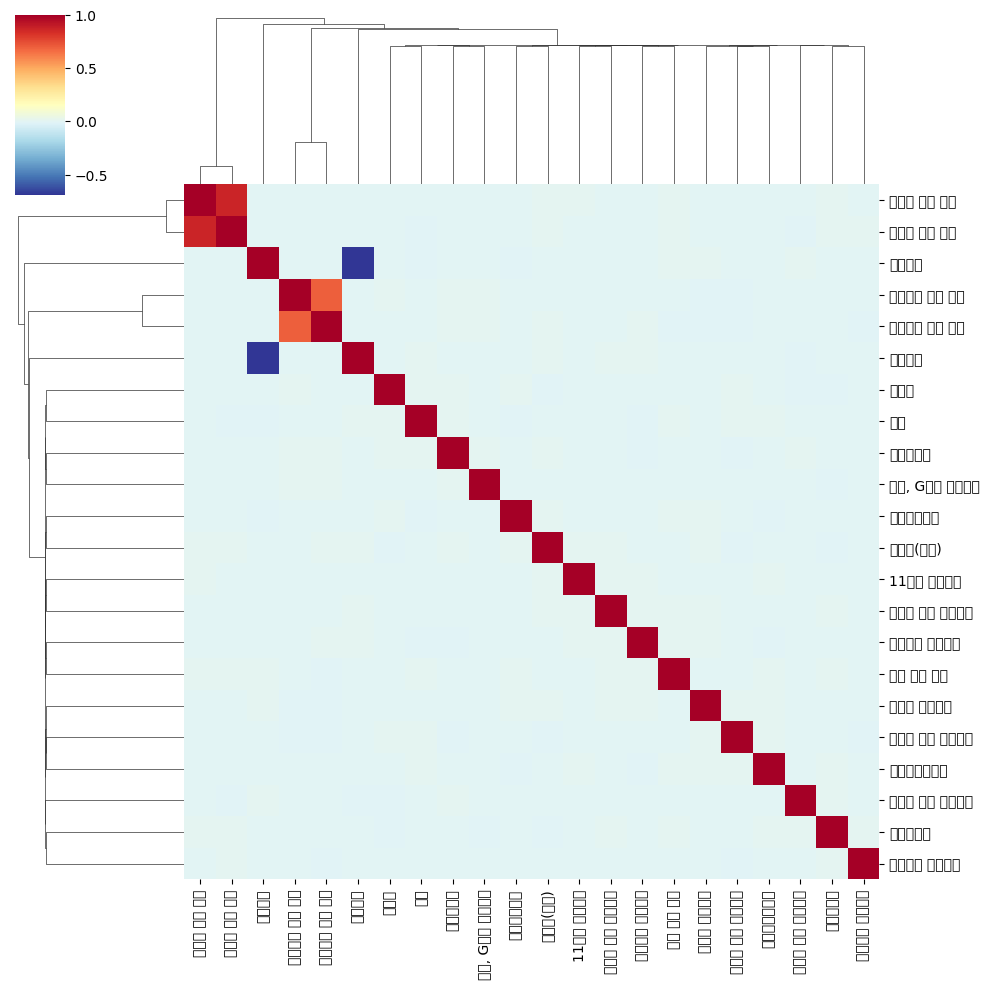

In [18]:
sns.clustermap(df2_before_corr, cmap = 'RdYlBu_r') #annot=True

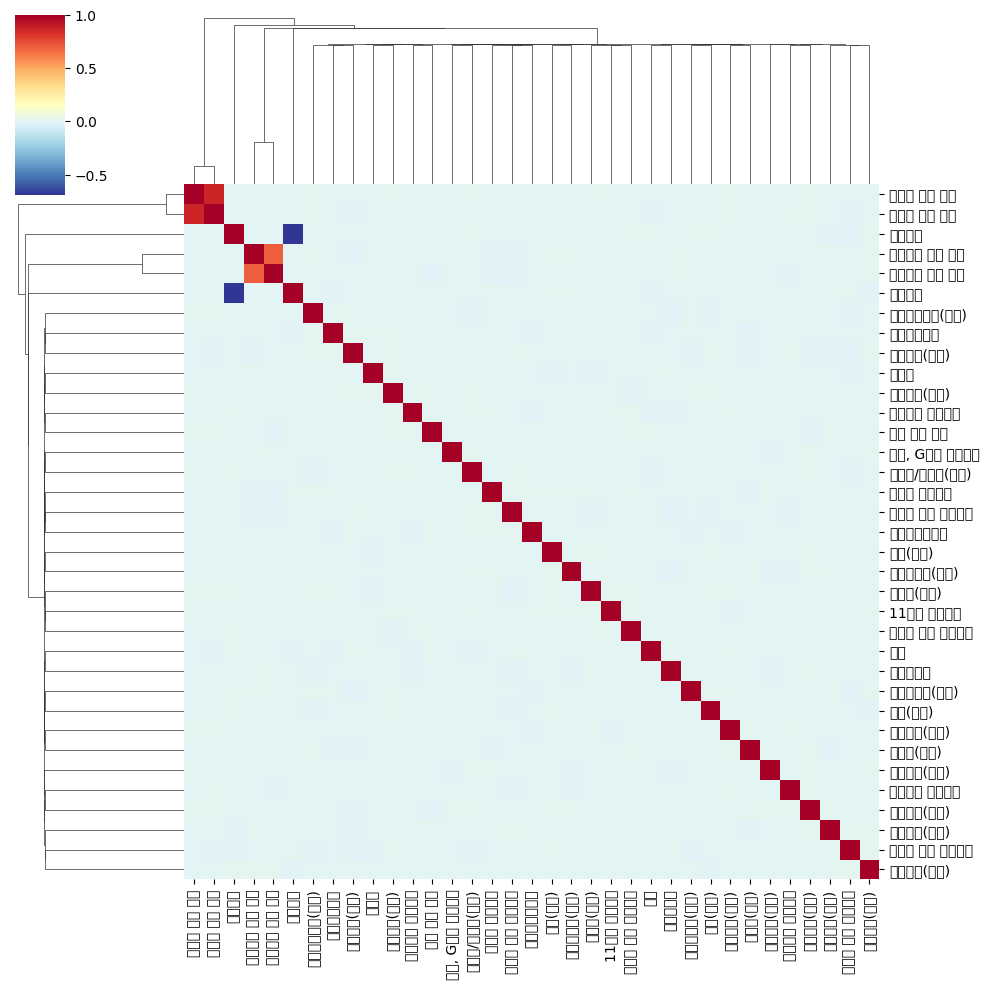

In [19]:
sns.clustermap(df2_after_corr, cmap = 'RdYlBu_r') #annot=True

In [20]:
# 비식별화 처리로 인해 숫자형이 많아짐

# Euclidian Distance

In [21]:
def get_euclidian_dist(point1, point2):
    return np.linalg.norm(point1 - point2)

In [22]:
score = 0
for colname in col_list:
    try:
        val = get_euclidian_dist(df_before[colname], df_after[colname])
        score += val
        print(f'[Success] {colname}: {str(val)}')
        
    except Exception as e:
        print(f'[Failed] {colname}: {str(e)}')

[Failed] 회원 ID: unsupported operand type(s) for -: 'str' and 'str'
[Success] 성별: 0.0
[Failed] 생년월일: unsupported operand type(s) for -: 'str' and 'str'
[Success] 가구특성: 0.0
[Success] 세대구분: 0.0
[Failed] 추정거주지: unsupported operand type(s) for -: 'int' and 'str'
[Success] 단말기코드: 0.0
[Success] 멤버십 사용 횟수: 0.0
[Success] 멤버십 사용 금액: 0.0
[Success] 소액결제 사용 횟수: 0.0
[Success] 소액결제 사용 금액: 0.0
[Success] 쿠팡사용일수: 0.0
[Success] 네이버 쇼핑 사용일수: 0.0
[Success] 11번가 사용일수: 0.0
[Success] 당근마켓 사용일수: 0.0
[Success] 옥션, G마켓 사용일수: 0.0
[Success] 요기요 사용일수: 0.0
[Success] 배달의 민족 사용일수: 0.0
[Success] 쿠팡이츠 사용일수: 0.0
[Failed] 패스트패션(지수): unsupported operand type(s) for -: 'str' and 'float'
[Failed] 명품의류(지수): unsupported operand type(s) for -: 'str' and 'float'
[Failed] 신발(지수): unsupported operand type(s) for -: 'str' and 'float'
[Failed] 배달음식(지수): unsupported operand type(s) for -: 'str' and 'float'
[Failed] 넷플릭스(지수): unsupported operand type(s) for -: 'str' and 'float'
[Failed] 영화(지수): unsupported operand type(s) for -: 'str'

In [23]:
score

0.0